<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/%EB%8D%B0%EC%A0%80)%EC%9C%84%EA%B2%BD%EB%8F%84_%EC%B6%94%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터저널 위경도 추출
- 노션 './전처리위경도전.csv' 업로드 후 시작

## 라이브러리 설치 및 import

In [ ]:
!pip install requests
!pip install folium

In [ ]:
import pandas as pd
import requests
import numpy as np
import folium

## 카카오맵 api 응답확인

In [ ]:
# 카카오맵 호출되는지 확인
# api 키 권한오류 시 코랩, 로컬 등 링크 허용 필요

def test_address(address):
  # restapi키
  api_key = "ec7cbcebaedfbf302ed77da39ea7ef3b"
  headers = {"Authorization": f"KakaoAK {api_key}"}

  # API 호출 URL
  url = "https://dapi.kakao.com/v2/local/search/address.json"

  # 요청 파라미터
  params = {"query": address}

  # API 요청
  response = requests.get(url, headers=headers, params=params)

  if response.status_code == 200:
      result = response.json()
      if result['documents']:
          # 위도와 경도를 추출
          x = result['documents'][0]['x']  # 경도
          y = result['documents'][0]['y']  # 위도
          return x, y
      else:
          return None
  else:
      print(f"Error {response.status_code}: {response.text}")
      return None


In [ ]:
# 사용 예제
address = "부산광역시 부산진구 전포대로 209번길 26"
coordinates = test_address(address)

if coordinates:
    print(f"주소: {address}")
    print(f"위도: {coordinates[1]}")
    print(f"경도: {coordinates[0]}")
else:
    print("좌표를 찾을 수 없습니다.")

주소: 부산광역시 부산진구 전포대로 209번길 26
위도: 35.1563611729441
경도: 129.062888281786


In [ ]:
# 사용 예제
address = "김천시 봉산면 태화리 175"
coordinates = test_address(address)

if coordinates:
    print(f"주소: {address}")
    print(f"위도: {coordinates[1]}")
    print(f"경도: {coordinates[0]}")
else:
    print("좌표를 찾을 수 없습니다.")

주소: 김천시 봉산면 태화리 175
위도: 36.152753126524
경도: 128.028617759111


## df 호출 및 반복문 구성

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 전국폐교재산기본정보표준데이터.csv to 전국폐교재산기본정보표준데이터.csv


In [ ]:
origin_df = pd.read_csv('전국폐교재산기본정보표준데이터.csv', encoding = 'cp949')
df = origin_df.copy()
df.head()

,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,시도코드,시도명,시군구코드,시군구명,폐교명,폐교연도,...,활용현황구분명,건물연면적,대지,담당자 부서명,담당자 전화번호,소재지도로명주소,소재지지번주소,데이터기준일자,제공기관코드,제공기관명
0,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성산초 보광분교장,1998.0,...,대부,466.65,115445.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 성산면 보광리 308,2023-07-01,7801000.0,강원특별자치도교육청
1,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,제비초등학교,1999.0,...,대부,889.50,198643.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 구정면 제비리 504,2023-07-01,7801000.0,강원특별자치도교육청
2,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,연곡초 퇴곡분교장,2000.0,...,대부,838.65,611654.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 연곡면 퇴곡리 225,2023-07-01,7801000.0,강원특별자치도교육청
3,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성덕초 병산분교장,2004.0,...,자체활용,1025.54,14035.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 병산동 445-5,2023-07-01,7801000.0,강원특별자치도교육청
4,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,왕산초 고단분교장,2010.0,...,대부,771.00,38804.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,2023-07-01,7801000.0,강원특별자치도교육청


In [ ]:
df

,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,시도코드,시도명,시군구코드,시군구명,폐교명,폐교연도,...,활용현황구분명,건물연면적,대지,담당자 부서명,담당자 전화번호,소재지도로명주소,소재지지번주소,데이터기준일자,제공기관코드,제공기관명
0,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성산초 보광분교장,1998.0,...,대부,466.65,115445.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 성산면 보광리 308,2023-07-01,7801000.0,강원특별자치도교육청
1,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,제비초등학교,1999.0,...,대부,889.50,198643.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 구정면 제비리 504,2023-07-01,7801000.0,강원특별자치도교육청
2,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,연곡초 퇴곡분교장,2000.0,...,대부,838.65,611654.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 연곡면 퇴곡리 225,2023-07-01,7801000.0,강원특별자치도교육청
3,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성덕초 병산분교장,2004.0,...,자체활용,1025.54,14035.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 병산동 445-5,2023-07-01,7801000.0,강원특별자치도교육청
4,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,왕산초 고단분교장,2010.0,...,대부,771.00,38804.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,2023-07-01,7801000.0,강원특별자치도교육청
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,신산중학교,2001.0,...,자체활용,0.00,16192.0,교육재정과,064-710-0753,NaN,제주특별자치도 서귀포시 성산읍 신산리 953,2023-11-20,9290000.0,제주특별자치도교육청
1183,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,가시초등학교,2001.0,...,대부,1087.29,13815.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 가시로613번길 46,NaN,2023-11-20,9290000.0,제주특별자치도교육청
1184,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,화산초등학교,2001.0,...,대부,1352.81,16115.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 세화강왓로 105,NaN,2023-11-20,9290000.0,제주특별자치도교육청
1185,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,하천초등학교,2001.0,...,대부,1237.13,8026.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 하천로 11,NaN,2023-11-20,9290000.0,제주특별자치도교육청


In [ ]:
# itterroa 순회
def get_coordinates(address, api_key):
    """주소를 위경도로 변환하는 함수"""
    headers = {"Authorization": f"KakaoAK {api_key}"}
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            x = result['documents'][0]['x']  # 경도
            y = result['documents'][0]['y']  # 위도
            print(result,x,y)
            return x, y
    return np.nan, np.nan

In [ ]:
#보안상 빼둠
api_key = "ec7cbcebaedfbf302ed77da39ea7ef3b"

# 좌표를 저장할 빈 리스트 초기화
longitudes = []
latitudes = []

# DataFrame 순회
for index, row in df.iterrows():
    if pd.notna(row['소재지도로명주소']):
        address = row['소재지도로명주소']
    elif pd.notna(row['소재지지번주소']):
        address = row['소재지지번주소']
    else:
        longitudes.append(np.nan)  # 주소를 찾을 수 없는 경우 NaN 추가
        latitudes.append(np.nan)
        continue  # 다음 행으로 이동

    longitude, latitude = get_coordinates(address, api_key)
    longitudes.append(longitude)
    latitudes.append(latitude)

# DataFrame에 경도 및 위도 열 추가
df['경도'] = longitudes  # 리스트를 새 열에 할당
df['위도'] = latitudes

{'documents': [{'address': {'address_name': '강원특별자치도 강릉시 성산면 보광리 308', 'b_code': '5115031026', 'h_code': '5115031000', 'main_address_no': '308', 'mountain_yn': 'N', 'region_1depth_name': '강원특별자치도', 'region_2depth_name': '강릉시', 'region_3depth_h_name': '성산면', 'region_3depth_name': '성산면 보광리', 'sub_address_no': '', 'x': '128.807564160077', 'y': '37.7371574579017'}, 'address_name': '강원특별자치도 강릉시 성산면 보광리 308', 'address_type': 'REGION_ADDR', 'road_address': {'address_name': '강원특별자치도 강릉시 성산면 보현길 5', 'building_name': '', 'main_building_no': '5', 'region_1depth_name': '강원특별자치도', 'region_2depth_name': '강릉시', 'region_3depth_name': '성산면 보광리', 'road_name': '보현길', 'sub_building_no': '', 'underground_yn': 'N', 'x': '128.807187570527', 'y': '37.7373679985424', 'zone_no': '25442'}, 'x': '128.807564160077', 'y': '37.7371574579017'}], 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}} 128.807564160077 37.7371574579017
{'documents': [{'address': {'address_name': '강원특별자치도 강릉시 구정면 제비리 504', 'b_c

In [ ]:
df

,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,시도코드,시도명,시군구코드,시군구명,폐교명,폐교연도,...,대지,담당자 부서명,담당자 전화번호,소재지도로명주소,소재지지번주소,데이터기준일자,제공기관코드,제공기관명,경도,위도
0,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성산초 보광분교장,1998.0,...,115445.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 성산면 보광리 308,2023-07-01,7801000.0,강원특별자치도교육청,128.807564160077,37.7371574579017
1,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,제비초등학교,1999.0,...,198643.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 구정면 제비리 504,2023-07-01,7801000.0,강원특별자치도교육청,128.858041346407,37.7064251559247
2,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,연곡초 퇴곡분교장,2000.0,...,611654.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 연곡면 퇴곡리 225,2023-07-01,7801000.0,강원특별자치도교육청,128.739768716267,37.8507369459811
3,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,성덕초 병산분교장,2004.0,...,14035.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 병산동 445-5,2023-07-01,7801000.0,강원특별자치도교육청,128.939989523001,37.7584870935743
4,7801000.0,강원특별자치도교육청,7832000.0,강릉교육지원청,51.0,강원특별자치도,150.0,강릉시,왕산초 고단분교장,2010.0,...,38804.0,행정과,033-640-3366,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,2023-07-01,7801000.0,강원특별자치도교육청,128.84865851311,37.5199416538742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,신산중학교,2001.0,...,16192.0,교육재정과,064-710-0753,NaN,제주특별자치도 서귀포시 성산읍 신산리 953,2023-11-20,9290000.0,제주특별자치도교육청,126.87273283556,33.3826104531105
1183,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,가시초등학교,2001.0,...,13815.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 가시로613번길 46,NaN,2023-11-20,9290000.0,제주특별자치도교육청,126.771933058134,33.3556499881124
1184,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,화산초등학교,2001.0,...,16115.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 세화강왓로 105,NaN,2023-11-20,9290000.0,제주특별자치도교육청,126.795936904144,33.3267718558007
1185,9290000.0,제주특별자치도교육청,9299000.0,제주특별자치도 서귀포시교육지원청,50.0,제주특별자치도,130.0,서귀포시,하천초등학교,2001.0,...,8026.0,교육재정과,064-710-0753,제주특별자치도 서귀포시 표선면 하천로 11,NaN,2023-11-20,9290000.0,제주특별자치도교육청,126.84332069767,33.3437439987178


## 해당 df 다운로드

In [ ]:
from google.colab import files

In [ ]:
df.to_csv('폐교데이터_위경도완.csv', index = False, encoding = 'cp949')
files.download('폐교데이터_위경도완.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 함수 잘돌았는지 시각화해보기

In [ ]:
df.head()

,시도명,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,소재지도로명주소,소재지지번주소,경도,위도
0,강원특별자치도,강릉시,왕산초 고단분교장,2010,초등학교,대부,771.00,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,128.84865851311,37.5199416538742
1,강원특별자치도,강릉시,옥계초 남양분교장,2011,초등학교,대부,892.00,NaN,강원특별자치도 강릉시 옥계면 남양리 528,129.031198121156,37.5806003602398
2,강원특별자치도,양양군,양양여자중학교,2019,중학교,자체활용,10566.93,NaN,강원특별자치도 양양군 양양읍 서문리 224,128.613236978881,38.0728988633267
3,강원특별자치도,원주시,문막초 취병분교장,2014,초등학교,대부,539.58,NaN,강원특별자치도 원주시 문막읍 취병리 358,127.800600665593,37.3112064525129
4,부산광역시,부산진구,중앙초등학교,2008,초등학교,자체활용,5178.00,부산광역시 부산진구 전포대로 209번길 26,NaN,129.062888281786,35.1563611729441


In [ ]:
sample = df.iloc[200]
sample

,200
시도명,전라남도
시군구명,여수시
폐교명,초도초등학교
폐교연도,2017
학교급구분명,초등학교
활용현황구분명,대부
건물연면적,773.0
소재지도로명주소,전라남도 여수시 초도로 48
소재지지번주소,전라남도 여수시 삼산면 초도리 산 456
경도,127.249979618848


In [ ]:
map_center = [sample['위도'],sample['경도']]
m = folium.Map(location = map_center, zoom_start = 12)

folium.Marker(location = map_center, popup = sample['폐교명']).add_to(m)
m

## df 전체 folium 시각화

In [ ]:
# 지도 초기 설정 - 첫 번째 폐교 위치를 중심으로 지도 설정
# 위경도 숫자 관련 에러확인
df['위도'] = pd.to_numeric(df['위도'], errors='coerce')
df['경도'] = pd.to_numeric(df['경도'], errors='coerce')

# NaN 값을 가진 행 제거
df.dropna(subset=['위도', '경도'], inplace=True)  # '위도'와 '경도' 컬럼에서 NaN 값을 가진 행 제거

map_center = [df['위도'].mean(), df['경도'].mean()]  # 지도 중심은 평균으로
m = folium.Map(location=map_center, zoom_start=12)

# DataFrame을 순회하면서 각 위치에 마커 추가
for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['폐교명']}\n{row['소재지지번주소']}",
        tooltip=row['폐교명']
    ).add_to(m)

m  # 지도 출력

In [ ]:
# 마커 복잡하니 클러스터링하기
from folium.plugins import MarkerCluster
# 지도 초기 설정 - 첫 번째 폐교 위치를 중심으로 지도 설정
# 위경도 숫자 관련 에러확인
df['위도'] = pd.to_numeric(df['위도'], errors='coerce')
df['경도'] = pd.to_numeric(df['경도'], errors='coerce')

# NaN 값을 가진 행 제거
df.dropna(subset=['위도', '경도'], inplace=True)  # '위도'와 '경도' 컬럼에서 NaN 값을 가진 행 제거

map_center = [df['위도'].mean(), df['경도'].mean()]  # 지도 중심은 평균으로
m = folium.Map(location=map_center, zoom_start=12)

# 클러스터 설정
marker_cluster = MarkerCluster().add_to(m)

# DataFrame을 순회하면서 각 위치에 마커 추가
for index, row in df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"{row['폐교명']}\n{row['소재지지번주소']}",
        tooltip=row['폐교명']
    ).add_to(marker_cluster)

m  # 지도 출력

# 엑셀파일 변환

In [ ]:
import pandas as pd

In [ ]:
csv_df = pd.read_csv('./폐교데이터_위경도완.csv', encoding = 'cp949')
csv_df.to_excel('폐교데이터_위경도완.xlsx', index = False)

In [ ]:
excel_df = pd.read_excel('./폐교데이터_위경도완.xlsx')
excel_df.head()

,시도명,시군구명,폐교명,폐교연도,학교급구분명,활용현황구분명,건물연면적,소재지도로명주소,소재지지번주소,경도,위도
0,강원특별자치도,강릉시,왕산초 고단분교장,2010,초등학교,대부,771.00,NaN,강원특별자치도 강릉시 왕산면 고단리 32-18,128.848659,37.519942
1,강원특별자치도,강릉시,옥계초 남양분교장,2011,초등학교,대부,892.00,NaN,강원특별자치도 강릉시 옥계면 남양리 528,129.031198,37.580600
2,강원특별자치도,양양군,양양여자중학교,2019,중학교,자체활용,10566.93,NaN,강원특별자치도 양양군 양양읍 서문리 224,128.613237,38.072899
3,강원특별자치도,원주시,문막초 취병분교장,2014,초등학교,대부,539.58,NaN,강원특별자치도 원주시 문막읍 취병리 358,127.800601,37.311206
4,부산광역시,부산진구,중앙초등학교,2008,초등학교,자체활용,5178.00,부산광역시 부산진구 전포대로 209번길 26,NaN,129.062888,35.156361


In [ ]:
excel_df['경도'].dtype

dtype('float64')

# 폐교 연도별 이미지 추출
- 10년 단위

In [ ]:
total_df = pd.read_csv("./폐교데이터_위경도완(전체).csv", encoding = "cp949")
total_df["폐교연도"]

,폐교연도
0,1998.0
1,1999.0
2,2000.0
3,2004.0
4,2010.0
...,...
1182,2001.0
1183,2001.0
1184,2001.0
1185,2001.0


In [ ]:
# '폐교연도' 컬럼의 값별 개수를 세기
count_by_year = total_df['폐교연도'].value_counts()

# 결과 출력
# sort by the index which contains the years
print(count_by_year.sort_index())

폐교연도
1905.0      1
1976.0      1
1978.0      1
1981.0      2
1983.0      2
1989.0      3
1990.0     10
1991.0     31
1992.0     56
1993.0     43
1994.0     82
1995.0     77
1996.0     41
1997.0     40
1998.0     58
1999.0    182
2000.0     30
2001.0     17
2002.0     24
2003.0      8
2004.0     17
2005.0     13
2006.0      9
2007.0     33
2008.0     29
2009.0     38
2010.0     24
2011.0     16
2012.0     32
2013.0     23
2014.0     20
2015.0     20
2016.0     25
2017.0     30
2018.0     24
2019.0     36
2020.0     24
2021.0     17
2022.0     27
2023.0     18
2024.0      2
Name: count, dtype: int64


In [ ]:
# '폐교연도' 컬럼의 값별 개수를 세기
count_by_year = total_df['폐교연도'].value_counts()

# 결과 출력: 인덱스(연도) 기준으로 정렬
count_by_year = count_by_year.sort_index()

# 누적 합 계산
cumulative_count = count_by_year.cumsum()

# 결과 출력
print(cumulative_count)


폐교연도
1905.0       1
1976.0       2
1978.0       3
1981.0       5
1983.0       7
1989.0      10
1990.0      20
1991.0      51
1992.0     107
1993.0     150
1994.0     232
1995.0     309
1996.0     350
1997.0     390
1998.0     448
1999.0     630
2000.0     660
2001.0     677
2002.0     701
2003.0     709
2004.0     726
2005.0     739
2006.0     748
2007.0     781
2008.0     810
2009.0     848
2010.0     872
2011.0     888
2012.0     920
2013.0     943
2014.0     963
2015.0     983
2016.0    1008
2017.0    1038
2018.0    1062
2019.0    1098
2020.0    1122
2021.0    1139
2022.0    1166
2023.0    1184
2024.0    1186
Name: count, dtype: int64


In [ ]:
# 조건에 따라 데이터를 필터링하는 함수
def filter_data_by_year(df, start_year, end_year):
    return df[(df['폐교연도'] >= start_year) & (df['폐교연도'] <= end_year)]

# 각 범위별로 피벗 테이블을 생성
pivot0590 = filter_data_by_year(total_df, 1905, 1990)
pivot9195 = filter_data_by_year(total_df, 1991, 1995)
pivot9600 = filter_data_by_year(total_df, 1996, 2000)
pivot0105 = filter_data_by_year(total_df, 2001, 2005)
pivot0610 = filter_data_by_year(total_df, 2006, 2010)
pivot1115 = filter_data_by_year(total_df, 2011, 2015)
pivot1620 = filter_data_by_year(total_df, 2016, 2020)
pivot2124 = filter_data_by_year(total_df, 2021, 2024)

# 결과 출력
pivot2124


,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,시도코드,시도명,시군구코드,시군구명,폐교명,폐교연도,...,대지,담당자 부서명,담당자 전화번호,소재지도로명주소,소재지지번주소,데이터기준일자,제공기관코드,제공기관명,경도,위도
36,7150000.0,부산광역시교육청,7150000.0,부산광역시교육청,26.0,부산광역시,440.0,강서구,가락중학교,2022.0,...,10076.0,재정과,051-860-0754,부산광역시 강서구 가락대로 1405,NaN,2024-07-01,7150000.0,부산광역시교육청,128.903603,35.190437
42,7801000.0,강원특별자치도교육청,7872000.0,삼척교육지원청,51.0,강원특별자치도,230.0,삼척시,하장고등학교,2022.0,...,15597.0,행정과,033-570-5175,NaN,강원특별자치도 삼척시 하장면 광동리 121,2023-07-01,7801000.0,강원특별자치도교육청,128.934345,37.352481
43,7801000.0,강원특별자치도교육청,7872000.0,삼척교육지원청,51.0,강원특별자치도,230.0,삼척시,도계여자중학교,2023.0,...,0.0,행정과,033-570-5175,NaN,강원특별자치도 삼척시 도계읍 도계리 256,2023-07-01,7801000.0,강원특별자치도교육청,129.048561,37.231377
48,7150000.0,부산광역시교육청,7150000.0,부산광역시교육청,26.0,부산광역시,320.0,북구,덕천여자중학교,2022.0,...,14378.0,재정과,051-860-0754,부산광역시 북구 의성로 47번길 45-4,NaN,2024-07-01,7150000.0,부산광역시교육청,129.011581,35.217656
49,7150000.0,부산광역시교육청,7150000.0,부산광역시교육청,26.0,부산광역시,410.0,금정구,서곡초등학교,2022.0,...,16642.0,재정과,051-860-0754,부산광역시 금정구 윤산로 279,NaN,2024-07-01,7150000.0,부산광역시교육청,129.104851,35.220496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,8750000.0,경상북도교육청,8941000.0,경상북도칠곡교육지원청,47.0,경상북도,850.0,칠곡군,북삼초등학교 오평분교장,2022.0,...,12018.0,행정지원과,054-979-2174,경상북도 칠곡군 북삼읍 시덕로 311,경상북도 칠곡군 북삼읍 오평리 847-7,2023-11-28,8941000.0,경상북도교육청 경상북도칠곡교육지원청,128.378364,36.058797
1093,8750000.0,경상북도교육청,8901000.0,영덕교육지원청,47.0,경상북도,518.0,영덕군,축산항초등학교 경정분교장,2023.0,...,11946.0,행정지원과,054-730-8063,경상북도 영덕군 축산면 경정길 17,경상북도 영덕군 축산면 경정리 234,2023-11-22,8901000.0,경상북도교육청 경상북도영덕교육지원청,129.433880,36.486087
1120,8320000.0,전라북도교육청,8341000.0,군산교육지원청,45.0,전라북도,467.0,군산시,대야초광산분교,2023.0,...,1408.0,행정지원과,063-450-2754,전라북도 군산시 대야면 번영로 1421,전라북도 군산시 대야면 접산리 391-15,2023-11-23,8320000.0,전라북도교육청,126.866729,35.935683
1121,8320000.0,전라북도교육청,8341000.0,군산교육지원청,45.0,전라북도,467.0,군산시,동산중,2023.0,...,7577.0,행정지원과,063-450-2755,전라북도 군산시 구영신창길 60-6,전라북도 군산시 금동 26-83,2023-11-23,8320000.0,전라북도교육청,126.707169,35.988578


In [ ]:
pip install basemap basemap-data-hires

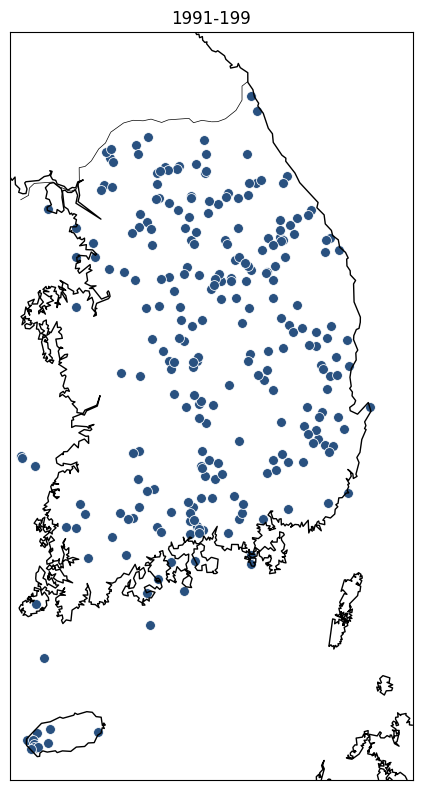

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

# 그리드 끄기
#

# Basemap을 사용해 지도 그리기
plt.figure(figsize=(12, 8))

# 남한 지도만 보이도록 범위 설정
m = Basemap(
    llcrnrlon=126,  # 왼쪽 경도
    llcrnrlat=33,   # 아래쪽 위도
    urcrnrlon=130,  # 오른쪽 경도
    urcrnrlat=39,   # 위쪽 위도
    resolution='i', # 지도 해상도 (intermediate)
    projection='merc'  # Mercator 투영법
)

# 지도에 해안선과 국가 경계선을 추가
m.drawcoastlines()
m.drawcountries()


# 위경도 데이터를 지도에 플로팅 (경도와 위도 변환)
longitudes = pivot9195['경도'].values
latitudes = pivot9195['위도'].values
x, y = m(longitudes, latitudes)  # 위도와 경도를 Basemap 좌표로 변환

# 위경도 데이터를 시각화 (색상을 학교급구분명으로 구분)
sns.scatterplot(x=x, y=y,s=50, color = '#295180')

# 제목 및 설정
plt.title('1991-199')
plt.tight_layout()
plt.show()


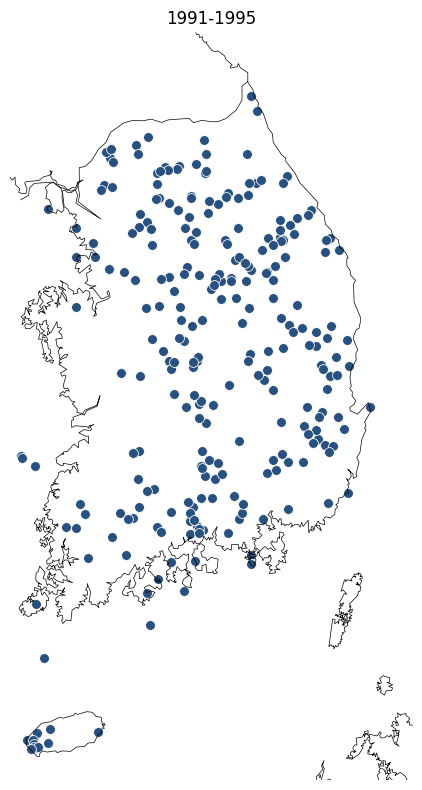

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

# Basemap을 사용해 지도 그리기
plt.figure(figsize=(12, 8))

# 남한 지도만 보이도록 범위 설정
m = Basemap(
    llcrnrlon=126,  # 왼쪽 경도
    llcrnrlat=33,   # 아래쪽 위도
    urcrnrlon=130,  # 오른쪽 경도
    urcrnrlat=39,   # 위쪽 위도
    resolution='i', # 지도 해상도 (intermediate)
    projection='merc'  # Mercator 투영법
)


# 지도에 해안선과 국가 경계선을 추가
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)

# 위경도 데이터를 지도에 플로팅 (경도와 위도 변환)
longitudes = pivot9195['경도'].values
latitudes = pivot9195['위도'].values
x, y = m(longitudes, latitudes)  # 위도와 경도를 Basemap 좌표로 변환

# 위경도 데이터를 시각화 (색상을 학교급구분명으로 구분)
sns.scatterplot(x=x, y=y, s=50, color='#295180')

# 제목 및 설정
plt.title('1991-1995')
plt.tight_layout()

# 플롯 테두리 제거 (frameon=False)
plt.gca().set_frame_on(False)

# 결과 출력
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

# 함수 정의: pivot 데이터와 파일명을 인자로 받아 이미지를 생성하고 저장하는 함수
def save_map(pivot_data, title, filename):
    plt.figure(figsize=(12, 8))

    # 남한 지도만 보이도록 범위 설정
    m = Basemap(
        llcrnrlon=126,  # 왼쪽 경도
        llcrnrlat=33,   # 아래쪽 위도
        urcrnrlon=130,  # 오른쪽 경도
        urcrnrlat=39,   # 위쪽 위도
        resolution='i', # 지도 해상도 (intermediate)
        projection='merc'  # Mercator 투영법
    )

    # 지도에 해안선과 국가 경계선을 추가
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)

    # 위경도 데이터를 지도에 플로팅 (경도와 위도 변환)
    longitudes = pivot_data['경도'].values
    latitudes = pivot_data['위도'].values
    x, y = m(longitudes, latitudes)  # 위도와 경도를 Basemap 좌표로 변환

    # 위경도 데이터를 시각화
    sns.scatterplot(x=x, y=y, s=50, color='#295180')

    # 제목 및 설정 (숫자만 사용)
    plt.title(title)
    plt.tight_layout()

    # 플롯 테두리 제거 (frameon=False)
    plt.gca().set_frame_on(False)

    # 이미지 파일로 저장
    plt.savefig(filename, dpi=300)  # 파일을 높은 해상도로 저장
    plt.close()  # 플롯을 닫아 메모리 절약

# pivot 데이터들을 이미지로 저장
save_map(pivot0590, '1905-1990', 'pivot0590_map.png')
save_map(pivot9195, '1991-1995', 'pivot9195_map.png')
save_map(pivot9600, '1996-2000', 'pivot9600_map.png')
save_map(pivot0105, '2001-2005', 'pivot0105_map.png')
save_map(pivot0610, '2006-2010', 'pivot0610_map.png')
save_map(pivot1115, '2011-2015', 'pivot1115_map.png')
save_map(pivot1620, '2016-2020', 'pivot1620_map.png')
save_map(pivot2124, '2021-2024', 'pivot2124_map.png')


## 연도별 gif 추출

In [ ]:
!pip install imageio

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import imageio
import os

# 함수 정의: pivot 데이터와 파일명을 인자로 받아 이미지를 생성하고 저장하는 함수
def save_map(pivot_data, title, filename):
    plt.figure(figsize=(12, 8))

    # 남한 지도만 보이도록 범위 설정
    m = Basemap(
        llcrnrlon=126,  # 왼쪽 경도
        llcrnrlat=33,   # 아래쪽 위도
        urcrnrlon=130,  # 오른쪽 경도
        urcrnrlat=39,   # 위쪽 위도
        resolution='i', # 지도 해상도 (intermediate)
        projection='merc'  # Mercator 투영법
    )

    # 지도에 해안선과 국가 경계선을 추가
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)

    # 위경도 데이터를 지도에 플로팅 (경도와 위도 변환)
    longitudes = pivot_data['경도'].values
    latitudes = pivot_data['위도'].values
    x, y = m(longitudes, latitudes)  # 위도와 경도를 Basemap 좌표로 변환

    # 위경도 데이터를 시각화
    sns.scatterplot(x=x, y=y, s=50, color='#295180')

    # 제목 및 설정 (숫자만 사용)
    plt.title(title)
    plt.tight_layout()

    # 플롯 테두리 제거 (frameon=False)
    plt.gca().set_frame_on(False)

    # 이미지 파일로 저장
    plt.savefig(filename, dpi=300)  # 파일을 높은 해상도로 저장
    plt.close()  # 플롯을 닫아 메모리 절약

# pivot 데이터들을 이미지로 저장
save_map(pivot0590, '1905-1990', 'pivot0590_map.png')
save_map(pivot9195, '1991-1995', 'pivot9195_map.png')
save_map(pivot9600, '1996-2000', 'pivot9600_map.png')
save_map(pivot0105, '2001-2005', 'pivot0105_map.png')
save_map(pivot0610, '2006-2010', 'pivot0610_map.png')
save_map(pivot1115, '2011-2015', 'pivot1115_map.png')
save_map(pivot1620, '2016-2020', 'pivot1620_map.png')
save_map(pivot2124, '2021-2024', 'pivot2124_map.png')

# 저장한 이미지 파일 이름 리스트
image_files = [
    'pivot0590_map.png',
    'pivot9195_map.png',
    'pivot9600_map.png',
    'pivot0105_map.png',
    'pivot0610_map.png',
    'pivot1115_map.png',
    'pivot1620_map.png',
    'pivot2124_map.png'
]

# 이미지 파일들을 불러와 GIF로 변환 : 길이조절은 duration으로
with imageio.get_writer('pivot_maps_3.gif', mode='I', duration= 3) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# GIF가 생성된 디렉토리 확인 (Optional)
os.listdir()


<ipython-input-41-471200dca3b2>:69: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


['.config',
 'pivot_maps_10.gif',
 'pivot_maps_3.gif',
 'pivot1115_map.png',
 'pivot_maps.gif',
 'pivot0105_map.png',
 'pivot0590_map.png',
 'pivot9600_map.png',
 'pivot1620_map.png',
 'pivot2124_map.png',
 'pivot0610_map.png',
 'pivot9195_map.png',
 '폐교데이터_위경도완(전체).csv',
 'sample_data']

In [ ]:
# 각 이미지가 5초 동안 표시되도록 설정
with imageio.get_writer('pivot_maps_check.gif', mode='I', duration=5) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)


<ipython-input-45-2a970c6040a3>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


## 누적 gif 뽑기

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import imageio
import os
import pandas as pd

# 누적 맵을 저장하는 함수 정의
def save_cumulative_map(pivot_data_list, titles):
    cumulative_data = pd.DataFrame()  # 누적 데이터 초기화
    image_files = []  # 이미지 파일 리스트 초기화

    for i, pivot_data in enumerate(pivot_data_list):
        cumulative_data = pd.concat([cumulative_data, pivot_data], ignore_index=True)  # 누적 데이터 생성
        filename = f'cumulative_map_{i}.png'  # 파일 이름 생성

        plt.figure(figsize=(12, 8))

        # 남한 지도만 보이도록 범위 설정
        m = Basemap(
            llcrnrlon=126,  # 왼쪽 경도
            llcrnrlat=33,   # 아래쪽 위도
            urcrnrlon=130,  # 오른쪽 경도
            urcrnrlat=39,   # 위쪽 위도
            resolution='i', # 지도 해상도 (intermediate)
            projection='merc'  # Mercator 투영법
        )

        # 지도에 해안선과 국가 경계선을 추가
        m.drawcoastlines(linewidth=0.5)
        m.drawcountries(linewidth=0.5)

        # 위경도 데이터를 누적 지도에 플로팅 (경도와 위도 변환)
        longitudes = cumulative_data['경도'].values
        latitudes = cumulative_data['위도'].values
        x, y = m(longitudes, latitudes)  # 위도와 경도를 Basemap 좌표로 변환

        # 위경도 데이터를 시각화
        sns.scatterplot(x=x, y=y, s=50, color='#295180')

        # 제목 및 설정
        plt.title(titles[i])
        plt.tight_layout()

        # 플롯 테두리 제거
        plt.gca().set_frame_on(False)

        # 이미지 파일로 저장
        plt.savefig(filename, dpi=300)  # 파일을 높은 해상도로 저장
        plt.close()  # 플롯을 닫아 메모리 절약

        image_files.append(filename)  # 이미지 파일 리스트에 추가

    return image_files  # 이미지 파일 리스트 반환

# 각 pivot 데이터 리스트와 제목 리스트
pivot_data_list = [pivot0590, pivot9195, pivot9600, pivot0105, pivot0610, pivot1115, pivot1620, pivot2124]
titles = ['1905-1990', '1905-1990 + 1991-1995', '1905-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020', '2021-2024']

# 누적된 지도 이미지 파일들을 저장
image_files = save_cumulative_map(pivot_data_list, titles)

# 이미지 파일들을 불러와 GIF로 변환
with imageio.get_writer('cumulative_maps.gif', mode='I', duration=5) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# 생성된 GIF 확인 (Optional)
os.listdir()


<ipython-input-47-a576b38aa6c7>:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


['.config',
 'pivot_maps_10.gif',
 'pivot_maps_3.gif',
 'cumulative_map_0.png',
 'cumulative_maps.gif',
 'cumulative_map_4.png',
 'pivot1115_map.png',
 'pivot_maps.gif',
 'cumulative_map_7.png',
 'pivot0105_map.png',
 'pivot0590_map.png',
 'cumulative_map_3.png',
 'pivot9600_map.png',
 'pivot1620_map.png',
 'pivot2124_map.png',
 'pivot0610_map.png',
 'pivot_maps_check.gif',
 'cumulative_map_2.png',
 'cumulative_map_1.png',
 'pivot9195_map.png',
 '폐교데이터_위경도완(전체).csv',
 'cumulative_map_6.png',
 'cumulative_map_5.png',
 'sample_data']

In [ ]:
# 누적된 지도 이미지 파일들을 GIF로 변환
image_files = [f'cumulative_map_{i}.png' for i in range(len(pivot_data_list))]

# 이미지 파일들을 불러와 GIF로 변환
with imageio.get_writer('cumulative_maps.gif', mode='I', duration=5) as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# GIF가 생성된 디렉토리 확인 (Optional)
os.listdir()

# 미활용 + 위경도 추출